**Name: Christ-Brian Amedjonekou**  
**Date: 1/30/2019**  
**MAT 4880-D692 (Math Modeling II) Whale Problem**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

# Whale Problem

**Variables**

$B = \text{number of blue whales}$  
$F = \text{number of finn whales}$  
$g_B = \text{growth rate for blue whales}$  
$g_F = \text{growth rate for finn whales}$  
$c_B = \text{competition term for blue whales}$  
$c_F = \text{competition term for finn whales}$  

**Assumptions**

$g_B = 0.05B\Big(1 - \dfrac{B}{150000}\Big)$

$g_F = 0.08B\Big(1 - \dfrac{B}{400000}\Big)$  

$c_B = c_F = \alpha BF; \text{ where } \alpha = 10^{-8}$

$\frac{dB}{dt} = g_B - c_B$

$\frac{dF}{dt} = g_F - c_F$

$B, F \geq 0$

**Objective**

$\text{Determine if } B\rightarrow 0 \text{ over time}$

### Modules

In [1]:
# Modules being called
import math as m
import numpy as np
from sympy.solvers import solve
import sympy as sp
from matplotlib import pyplot as plt
import seaborn as sn

### Variables

In [2]:
B,F = sp.symbols('B F')
g_B, g_F = 0.05*B*(1-B/150000), 0.08*F*(1-F/400000)
c_B, c_F = m.pow(10,-8)*B*F, m.pow(10,-8)*B*F
dBdt, dFdt = g_B - c_B, g_F - c_F

### Equillibrium Points

In [3]:
# init_session() displays LaTeX version of outputs; 'quiet= True' stops 
# init_session from printing messages regarding its status

sp.init_printing()

# Solution to the system (Equillibrium Points)

solve([dBdt, dFdt], B, F)

### Function

In [4]:
def dB_dt(blue, fin):
    growth_Blue = 0.05*blue*(1-blue/150000)
    competition_Blue = m.pow(10,-8)*blue*fin
    dBxdt = growth_Blue - competition_Blue
    return dBxdt
    
    
def dF_dt(blue, fin):
    growth_Fin = 0.08*fin*(1-fin/400000)
    competition_Fin = m.pow(10,-8)*blue*fin
    dFxdt = growth_Fin - competition_Fin
    return dFxdt

### Plotting Vector Field

Text(0,0.5,'Fin Whales')

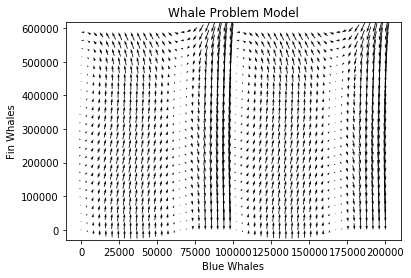

In [62]:
%matplotlib inline

# Creates the length of the 'X' and 'Y' Axis 
x, y = np.linspace(0, 200000), np.linspace(0, 600000)
X, Y = np.meshgrid(x, y)

# The approximated points of the functions dB/dt and dF/dt
U, V = [dB_dt(i, j) for i in x for j in y], [dF_dt(i, j) for i in x for j in y]

# Slice method used for indexing, specifically to make quiver plot vector arrows more visible

# Creates the plot
plt.figure()
Quiver = plt.quiver(X[::2], Y[::2], U[::2], V[::2], 
                    units= 'height', 
                    angles= 'uv', 
                    scale= 200000,
                    pivot= 'tip'
                   )

# Sets title and axes
plt.title('Whale Problem Model')
plt.xlabel('Blue Whales')
plt.ylabel('Fin Whales')